<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Introduction to Custom Databases:<br>Geochemical Sudoku!</h1><br />
</tr>
</table>
</left>

In this demo puzzle, try building up `granite0.csv` so that more and more solutes in a ~0.5 molal NaCl solution are buffered by minerals found in granite.

One solution to this puzzle is given in `granite6.csv`. Use it if you get stuck!

[What's in granite?](https://nature.berkeley.edu/classes/eps2/wisc/granite.html)
- 80% of the rock:
    - [quartz](https://en.wikipedia.org/wiki/Quartz) (10-50%)
    - potassium and plagioclase [feldspar](https://en.wikipedia.org/wiki/Feldspar) (like [albite](https://en.wikipedia.org/wiki/Albite))
- other common minerals:
    - [mica](https://en.wikipedia.org/wiki/Mica) ([muscovite](https://en.wikipedia.org/wiki/Muscovite) and [biotite](https://en.wikipedia.org/wiki/Biotite))
    - [hornblende](https://en.wikipedia.org/wiki/Hornblende) ([amphibole](https://en.wikipedia.org/wiki/Amphibole))
    
`wrm_data.csv` can be used to check which minerals have thermodynamic data for a speciation calculation.

***

### Things to try:
1) buffer SiO$_2$ with quartz (remember to use the `Hetero. equil.` subheader).
***
2) buffer pH with muscovite, KAl$_2$(AlSi$_3$)O$_{10}$(OH)$_2$.
    - This is trickier than it seems! For muscovite to be in the speciation calculation, concentrations of K, Al, and Si must also be constrained.
    - If you buffered SiO2 with quartz, Si is already constrained. How might you constrain K and Al?
***
3) buffer the oxidation-reduction (redox) potential.
    - *Hint*: in the CSV change `logfO2` to `O2(g)` (subheader: Hetero. equil.) and set `redox_flag="O2(g)",` in the notebook speciation function.
    - *Hint*: hematite and magnetite are found in granite and contain different oxidation states of iron. If one of these minerals buffers O$_{2(g)}$, what could the other mineral constrain?
***
4) change the temperature of the sample to 500 °C and run it.
    - What differences in speciation do you see?
***
5) change sample pressure to 2 kb and run it.
    - How does this affect the speciation of the fluid?
***
6) **CHALLENGE:** If the granite is hydothermally altered, you could introduce other minerals! Try fitting as many of the following minerals into the speciation as you can. Can you get them all (and more)?
    - *Hint*: you may have to constrain some elements with aqueous species.

- quartz : SiO$_2$
- K-feldspar : K(AlSi$_3$)O$_8$
- muscovite : KAl$_2$(AlSi$_3$)O$_{10}$(OH)$_2$
- dolomite : CaMg(CO$_3$)$_2$
- hematite : Fe$_2$O$_3$
- magnetite : Fe$_3$O$_4$
- albite : Na(AlSi$_3$)O$_8$
- fluorite : CaF$_2$
- clinochlore,7a : Mg$_5$Al(AlSi$_3$)O$_{10}$(OH)$_8$
- galena : PbS
- sphalerite : ZnS
***

In [1]:
# get the notebook ready
import AqEquil
ae = AqEquil.AqEquil()

In [28]:
# speciate the sample with the online 'wrm_data.csv' database
speciation = ae.speciate( # speciation function
    input_filename = "granite0.csv", # name of csv with fluid sample data
    db = "https://raw.githubusercontent.com/worm-portal/WORM-db/master/wrm_data.csv", # thermodynamic database
    redox_flag = "logfO2", # "logfO2" by default. "O2(g)" can also be used here
    delete_generated_folders = True, # clean up extra files after the calculation?
    )

Getting 'wrm_data.csv' ready. This will take a moment...
Using wrm_data.csv to speciate granite0
Finished!


In [29]:
# look up multiple variables at once
speciation.lookup(["Temperature", "Pressure", "pH", "O2(g)"])

Sample,Temperature,Pressure,pH,O2(g)
,degC,bar,pH,log_fugacity
granite0,200.0,1000.0,6.0,-6


In [16]:
speciation.lookup(["Temperature", "Pressure",
                        "SiO2", "HSiO3-", "NaHSiO3"])

Sample,Temperature,Pressure,HSiO3-,NaHSiO3,SiO2
,degC,bar,log_activity,log_activity,log_activity
granite4,500.0,1000.0,-6.5124,-5.8304,-1.3668


In [17]:
speciation.lookup(["Temperature", "Pressure",
                        "Na+", "K+", "Cl-", "KCl", "NaCl", "HCl"])

Sample,Temperature,Pressure,Cl-,HCl,K+,KCl,Na+,NaCl
,degC,bar,log_activity,log_activity,log_activity,log_activity,log_activity,log_activity
granite4,500.0,1000.0,-1.4143,-3.1244,-2.0287,-1.5749,-1.3319,-0.4826


In [18]:
speciation.lookup(["Temperature", "Pressure",
                   "Al+3", "AlOH+2", "AlO+", "HAlO2", "AlO2-"])

Sample,Temperature,Pressure,Al+3,AlO+,AlO2-,AlOH+2,HAlO2
,degC,bar,log_activity,log_activity,log_activity,log_activity,log_activity
granite4,500.0,1000.0,-20.7218,-10.6474,-5.3482,-14.1702,-7.5263


In [19]:
speciation.lookup(["Temperature", "Pressure", "pH", "O2(g)",
                   "Fe+2", "FeCl+", "FeOH+", "FeO"])

Sample,Temperature,Pressure,Fe+2,FeCl+,FeO,FeOH+,pH,O2(g)
,degC,bar,log_activity,log_activity,log_activity,log_activity,pH,log_fugacity
granite4,500.0,1000.0,-9.6672,-6.8613,-7.4985,-8.011,5.4785,-19.2684


In [20]:
speciation.lookup(["Temperature", "Pressure",
                   "Pb+2", "PbCl+", "PbOH+", "PbO", "HS-"])

Sample,Temperature,Pressure
,degC,bar
granite4,500.0,1000.0


In [21]:
speciation.lookup(["Temperature", "Pressure",
                   "Ca+2", "Mg+2", "F-", "HCO3-", "Zn+2"])

Sample,Temperature,Pressure
,degC,bar
granite4,500.0,1000.0


In [22]:
# check mineral saturation indices in the fluid
speciation.plot_mineral_saturation("granite0")

Exception: Could not find 'granite0' among sample names in the speciation report. Sample names include ['granite4']

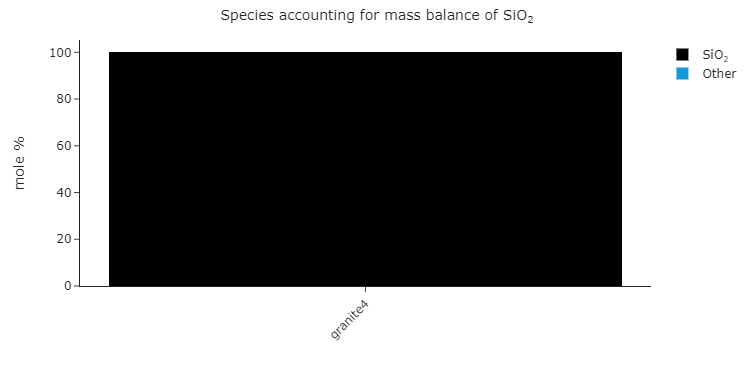

In [27]:
speciation.plot_mass_contribution("SiO2", sort_y_by="alphabetical")